# Description 
* **work_year**	The year the salary was paid.

* **experience_level**	The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director

* **employment_type**	The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance

* **job_title**	The role worked in during the year.

* **salary** The total gross salary amount paid.

* **salary_currency**	The currency of the salary paid as an ISO 4217 currency code.

* **salaryinusd**	The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).

* **employee_residence**	Employee's primary country of residence in during the work year as an ISO 3166 country code.

* **remote_ratio**	The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)

* **company_location**	The country of the employer's main office or contracting branch as an ISO 3166 country code.

* **company_size**	The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)

In [1]:
import pandas as pd
import string
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import janitor

# Read Data

In [2]:
df = pd.read_csv("C:\SAINS DATA\dataset\ds_salaries.csv")
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


# EDA

In [3]:
df.shape

(607, 12)

In [4]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [5]:
print(df.columns)

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')


In [6]:
df['experience_level'].unique()
df['employment_type'].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [7]:
# CHANGE ROW VALUES

# ? USING NUMPY.WHERE
df['experience_level'] = np.where(df['experience_level'] == 'MI', 'Mid-level', df['experience_level'])

# ? USING PANDAS.LOC
df.loc[df['experience_level'] == 'MI', 'experience_level'] = 'Mid_level'


In [8]:
# CHANGE ROW VALUES

# ? USING PANDAS
# new_df = df.replace({'experience_level' : {'MI' : 'Mid-level', 'SE' : 'Senior-level','EN' : 'Entry-level','EX' : 'Executive-level'}})

# ? USING JANITOR
new_df = df.find_replace(match='exact', 
                        experience_level = {'MI' : 'Mid-level', 'SE' : 'Senior-level','EN' : 'Entry-level','EX' : 'Executive-level'}, 
                        employment_type = {'FT' : 'Full-time', 'CT' : 'Contract', 'PT' : 'Part-time', 'FL' : 'Freelance'}, 
                        company_size = {'S' : 'Small', 'M' : 'Medium', 'L' : 'Large'})

new_df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,Mid-level,Full-time,Data Scientist,70000,EUR,79833,DE,0,DE,Large
1,1,2020,Senior-level,Full-time,Machine Learning Scientist,260000,USD,260000,JP,0,JP,Small
2,2,2020,Senior-level,Full-time,Big Data Engineer,85000,GBP,109024,GB,50,GB,Medium
3,3,2020,Mid-level,Full-time,Product Data Analyst,20000,USD,20000,HN,0,HN,Small
4,4,2020,Senior-level,Full-time,Machine Learning Engineer,150000,USD,150000,US,50,US,Large
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,Senior-level,Full-time,Data Engineer,154000,USD,154000,US,100,US,Medium
603,603,2022,Senior-level,Full-time,Data Engineer,126000,USD,126000,US,100,US,Medium
604,604,2022,Senior-level,Full-time,Data Analyst,129000,USD,129000,US,0,US,Medium
605,605,2022,Senior-level,Full-time,Data Analyst,150000,USD,150000,US,100,US,Medium


In [9]:
new_df = new_df.drop(columns='Unnamed: 0')
new_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-level,Full-time,Data Scientist,70000,EUR,79833,DE,0,DE,Large
1,2020,Senior-level,Full-time,Machine Learning Scientist,260000,USD,260000,JP,0,JP,Small
2,2020,Senior-level,Full-time,Big Data Engineer,85000,GBP,109024,GB,50,GB,Medium
3,2020,Mid-level,Full-time,Product Data Analyst,20000,USD,20000,HN,0,HN,Small
4,2020,Senior-level,Full-time,Machine Learning Engineer,150000,USD,150000,US,50,US,Large
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,Senior-level,Full-time,Data Engineer,154000,USD,154000,US,100,US,Medium
603,2022,Senior-level,Full-time,Data Engineer,126000,USD,126000,US,100,US,Medium
604,2022,Senior-level,Full-time,Data Analyst,129000,USD,129000,US,0,US,Medium
605,2022,Senior-level,Full-time,Data Analyst,150000,USD,150000,US,100,US,Medium


## Filter

In [10]:
df1 = new_df.iloc[:, [1,2,3,6,7,10]]
df1
df1.loc[(df1.experience_level == 'Senior-level') 
            & (df1.job_title == 'Data Scientist') 
            & (df1.salary_in_usd > df1.salary_in_usd.mean())].sort_values('salary_in_usd', ascending = False).head(10)

,experience_level,employment_type,job_title,salary_in_usd,employee_residence,company_size
63,Senior-level,Full-time,Data Scientist,412000,US,Large
416,Senior-level,Full-time,Data Scientist,260000,US,Medium
486,Senior-level,Full-time,Data Scientist,230000,US,Medium
592,Senior-level,Full-time,Data Scientist,230000,US,Medium
472,Senior-level,Full-time,Data Scientist,220000,US,Medium
398,Senior-level,Full-time,Data Scientist,215300,US,Large
444,Senior-level,Full-time,Data Scientist,215300,US,Large
357,Senior-level,Full-time,Data Scientist,211500,US,Medium
574,Senior-level,Full-time,Data Scientist,210000,US,Medium
570,Senior-level,Full-time,Data Scientist,210000,US,Medium


In [11]:
new_df.query('salary == salary_in_usd')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,2020,Senior-level,Full-time,Machine Learning Scientist,260000,USD,260000,JP,0,JP,Small
3,2020,Mid-level,Full-time,Product Data Analyst,20000,USD,20000,HN,0,HN,Small
4,2020,Senior-level,Full-time,Machine Learning Engineer,150000,USD,150000,US,50,US,Large
5,2020,Entry-level,Full-time,Data Analyst,72000,USD,72000,US,100,US,Large
6,2020,Senior-level,Full-time,Lead Data Scientist,190000,USD,190000,US,100,US,Small
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,Senior-level,Full-time,Data Engineer,154000,USD,154000,US,100,US,Medium
603,2022,Senior-level,Full-time,Data Engineer,126000,USD,126000,US,100,US,Medium
604,2022,Senior-level,Full-time,Data Analyst,129000,USD,129000,US,0,US,Medium
605,2022,Senior-level,Full-time,Data Analyst,150000,USD,150000,US,100,US,Medium


In [15]:
country = ['US', 'IN']
new_df[~new_df.employee_residence.isin(country)].sort_values('salary_in_usd')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
176,2021,Mid-level,Full-time,Data Scientist,58000,MXN,2859,MX,0,MX,Small
185,2021,Mid-level,Full-time,Data Engineer,4000,USD,4000,IR,100,IR,Medium
238,2021,Entry-level,Full-time,Data Scientist,4000,USD,4000,VN,0,VN,Medium
15,2020,Mid-level,Full-time,Data Analyst,8000,USD,8000,PK,50,PK,Large
196,2021,Entry-level,Full-time,BI Data Analyst,9272,USD,9272,KE,100,KE,Small
...,...,...,...,...,...,...,...,...,...,...,...
358,2022,Senior-level,Full-time,Data Architect,192400,USD,192400,CA,100,CA,Medium
452,2022,Executive-level,Full-time,Director of Data Science,250000,CAD,196979,CA,50,CA,Large
490,2022,Senior-level,Full-time,Head of Data,200000,USD,200000,MY,100,US,Medium
160,2021,Executive-level,Full-time,Head of Data,230000,USD,230000,RU,50,RU,Large


In [13]:
new_df[(new_df.job_title.str.contains('machine', case=False)) & (new_df.company_location.str.endswith('A'))]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
29,2020,Senior-level,Full-time,Machine Learning Manager,157000,CAD,117104,CA,50,CA,Large
224,2021,Senior-level,Full-time,Machine Learning Scientist,225000,USD,225000,US,100,CA,Large
451,2022,Mid-level,Full-time,Machine Learning Developer,100000,CAD,78791,CA,100,CA,Medium
493,2022,Senior-level,Full-time,Machine Learning Developer,100000,CAD,78791,CA,100,CA,Medium


# Group By

## Berapa orang yang bekerja secara remote berdasarkan pengalaman?

In [95]:
G1 = new_df.groupby(['experience_level', 'remote_ratio']).count()[['job_title']]
G1_reset = G1.reset_index()
G1_reset

,experience_level,remote_ratio,job_title
0,Entry-level,0,14
1,Entry-level,50,25
2,Entry-level,100,49
3,Executive-level,0,3
4,Executive-level,50,5
5,Executive-level,100,18
6,Mid-level,0,56
7,Mid-level,50,42
8,Mid-level,100,115
9,Senior-level,0,54


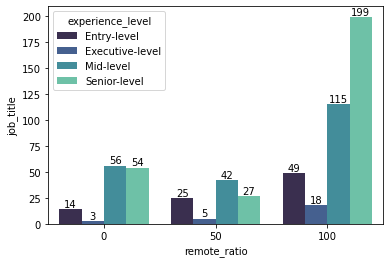

In [101]:
bar = sns.barplot(x = 'remote_ratio', y = 'job_title', hue= 'experience_level', 
            data = G1_reset, palette='mako')
for container in bar.containers:
    bar.bar_label(container)


## Data pekerjaan yang menghasilkan gaji terbanyak berdasarkan pengalaman yang telah dimiliki

In [29]:
new_df.groupby('experience_level').agg(max)[['job_title', 'employment_type', 'salary_in_usd']].sort_values('salary_in_usd', ascending = False)

,job_title,employment_type,salary_in_usd
experience_level,,,
Executive-level,Principal Data Scientist,Full-time,600000
Mid-level,Research Scientist,Part-time,450000
Senior-level,Staff Data Scientist,Full-time,412000
Entry-level,Research Scientist,Part-time,250000


In [103]:
groupby_year = new_df.groupby('work_year')
groupby_year.ngroups

3

## Jumlah karyawan berdasarkan pengalaman pada 3 jenis skala perusahaan yang berbeda

In [123]:
G2 = new_df.groupby('company_size')
G2

In [155]:
G2_query = G2['experience_level'].value_counts(normalize = False)
G2_query

company_size  experience_level
Large         Mid-level            86
              Senior-level         72
              Entry-level          29
              Executive-level      11
Medium        Senior-level        186
              Mid-level            98
              Entry-level          30
              Executive-level      12
Small         Entry-level          29
              Mid-level            29
              Senior-level         22
              Executive-level       3
Name: experience_level, dtype: int64

In [162]:
G2_reset = pd.DataFrame(G2_query).rename(columns = {'experience_level' : 'num_of_emp'}).reset_index()
G2_reset

,company_size,experience_level,num_of_emp
0,Large,Mid-level,86
1,Large,Senior-level,72
2,Large,Entry-level,29
3,Large,Executive-level,11
4,Medium,Senior-level,186
5,Medium,Mid-level,98
6,Medium,Entry-level,30
7,Medium,Executive-level,12
8,Small,Entry-level,29
9,Small,Mid-level,29


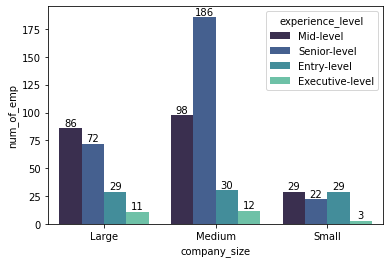

In [165]:
bar2 = sns.barplot(x = 'company_size', y = 'num_of_emp', hue= 'experience_level', 
            data = G2_reset, palette='mako')

for container in bar2.containers:
    bar2.bar_label(container)